In [59]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
import os, plotly
import plotly.express as px
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import datetime
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator

%matplotlib inline

In [48]:
proj_path = Path(os.getcwd()); print(proj_path)

C:\Users\Mo\OneDrive\Notes\CMU\02712\02-712-Bird-Migration


In [3]:
df_data = pd.read_csv(parent_path.parent/"Fall migration of white storks in 2014-gps.csv")
df_data.describe(include='all')

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,...,eobs:type-of-fix,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
count,7.169458e+06,7169458,7169458,7.165703e+06,7.165703e+06,16299,7.169458e+06,7.151294e+06,7.147554e+06,7.155667e+06,...,7.151294e+06,7.151294e+06,7.147554e+06,7.147554e+06,7.147554e+06,7169458,7169458,7.169458e+06,7169458,7169458
unique,NaN,2,1047340,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,NaN,60,1
top,NaN,True,2014-08-02 18:00:41.000,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ciconia ciconia,NaN,Nils / DER AU058 (eobs 3335),Fall migration of white storks in 2014
freq,NaN,7153159,95,NaN,NaN,16299,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7169458,7169458,NaN,271936,7169458
mean,3.974416e+09,NaN,NaN,6.502634e+00,4.579975e+01,NaN,3.962742e+03,3.936425e+03,2.442615e+00,2.146645e+09,...,2.998431e+00,1.142350e+02,5.294188e+00,1.695921e+02,6.460537e+02,NaN,NaN,3.620292e+03,NaN,NaN
std,2.071792e+06,NaN,NaN,3.263060e+00,3.041946e+00,NaN,1.164629e+02,1.156504e+02,3.097515e+00,1.240351e+09,...,6.858848e-02,8.542325e+01,6.040453e+00,1.127272e+02,4.000380e+02,NaN,NaN,3.865244e+02,NaN,NaN
min,3.970814e+09,NaN,NaN,-1.174656e+01,1.561229e+01,NaN,3.659000e+03,3.645000e+03,7.700000e-01,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-1.048100e+03,NaN,NaN,2.647000e+03,NaN,NaN
25%,3.972625e+09,NaN,NaN,4.394686e+00,4.357885e+01,NaN,3.850000e+03,3.825000e+03,1.540000e+00,1.072677e+09,...,3.000000e+00,4.400000e+01,4.000000e-02,5.767000e+01,4.538000e+02,NaN,NaN,3.337000e+03,NaN,NaN
50%,3.974417e+09,NaN,NaN,8.100508e+00,4.720818e+01,NaN,4.003000e+03,3.974000e+03,1.790000e+00,2.147032e+09,...,3.000000e+00,9.500000e+01,6.100000e-01,1.913700e+02,5.023000e+02,NaN,NaN,3.908000e+03,NaN,NaN
75%,3.976210e+09,NaN,NaN,8.919020e+00,4.775109e+01,NaN,4.063000e+03,4.038000e+03,2.300000e+00,3.220364e+09,...,3.000000e+00,1.750000e+02,1.050000e+01,2.608300e+02,7.724000e+02,NaN,NaN,3.929000e+03,NaN,NaN


In [79]:
df_data.head(2)

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,...,eobs:type-of-fix,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
7169456,3975524740,True,2014-10-01 20:00:07.000,-0.764940,38.201163,NaN,4024,4003.0,46.85,3.890891e+09,...,3.0,6.0,0.36,0.0,96.2,gps,Ciconia ciconia,3934,Zlipi / DER AU010 (eobs 3934),Fall migration of white storks in 2014
7169457,3972391183,True,2014-10-01 20:58:23.000,-0.765226,38.201185,NaN,4023,4003.0,2.82,4.164046e+09,...,3.0,22.0,0.05,0.0,52.9,gps,Ciconia ciconia,3934,Zlipi / DER AU010 (eobs 3934),Fall migration of white storks in 2014


In [84]:
df_data_processed = df_data.dropna(subset=['timestamp', 'location-long','location-lat','event-id'])
dt = pd.to_datetime(df_data_processed[['timestamp']].stack(), format='%Y-%m-%d %H:%M:%S')
df_data_processed['timestamp'] = dt.droplevel(level=1)
df_data_processed['time_delta'] = df_data_processed['timestamp'].diff(1)

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,...,eobs:type-of-fix,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
count,7.165703e+06,7165703,7165703,7.165703e+06,7.165703e+06,16299,7.165703e+06,7.147554e+06,7.147554e+06,7.151925e+06,...,7147554.0,7.147554e+06,7.147554e+06,7.147554e+06,7.147554e+06,7165703,7165703,7.165703e+06,7165703,7165703
unique,NaN,2,1046054,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,NaN,60,1
top,NaN,True,2014-08-02 18:00:41.000,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gps,Ciconia ciconia,NaN,Nils / DER AU058 (eobs 3335),Fall migration of white storks in 2014
freq,NaN,7149404,95,NaN,NaN,16299,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7165703,7165703,NaN,271904,7165703
mean,3.974416e+09,NaN,NaN,6.502634e+00,4.579975e+01,NaN,3.962725e+03,3.936406e+03,2.442615e+00,2.146643e+09,...,3.0,1.142703e+02,5.294188e+00,1.695921e+02,6.460537e+02,NaN,NaN,3.620289e+03,NaN,NaN
std,2.071775e+06,NaN,NaN,3.263060e+00,3.041946e+00,NaN,1.164658e+02,1.156510e+02,3.097515e+00,1.240355e+09,...,0.0,8.541929e+01,6.040453e+00,1.127272e+02,4.000380e+02,NaN,NaN,3.864954e+02,NaN,NaN
min,3.970814e+09,NaN,NaN,-1.174656e+01,1.561229e+01,NaN,3.666000e+03,3.657000e+03,7.700000e-01,0.000000e+00,...,3.0,3.000000e+00,0.000000e+00,0.000000e+00,-1.048100e+03,NaN,NaN,2.647000e+03,NaN,NaN
25%,3.972625e+09,NaN,NaN,4.394686e+00,4.357885e+01,NaN,3.850000e+03,3.825000e+03,1.540000e+00,1.072663e+09,...,3.0,4.400000e+01,4.000000e-02,5.767000e+01,4.538000e+02,NaN,NaN,3.337000e+03,NaN,NaN
50%,3.974417e+09,NaN,NaN,8.100508e+00,4.720818e+01,NaN,4.003000e+03,3.974000e+03,1.790000e+00,2.147010e+09,...,3.0,9.500000e+01,6.100000e-01,1.913700e+02,5.023000e+02,NaN,NaN,3.908000e+03,NaN,NaN
75%,3.976210e+09,NaN,NaN,8.919020e+00,4.775109e+01,NaN,4.063000e+03,4.038000e+03,2.300000e+00,3.220364e+09,...,3.0,1.750000e+02,1.050000e+01,2.608300e+02,7.724000e+02,NaN,NaN,3.929000e+03,NaN,NaN


In [135]:
df_data_processed.describe(include='all', datetime_is_numeric=True)

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,eobs:battery-voltage,eobs:fix-battery-voltage,eobs:horizontal-accuracy-estimate,eobs:key-bin-checksum,...,eobs:used-time-to-get-fix,ground-speed,heading,height-above-ellipsoid,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,time_delta
count,7.165703e+06,7165703,7165703,7.165703e+06,7.165703e+06,16299,7.165703e+06,7.147554e+06,7.147554e+06,7.151925e+06,...,7.147554e+06,7.147554e+06,7.147554e+06,7.147554e+06,7165703,7165703,7.165703e+06,7165703,7165703,7165702
unique,NaN,2,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,NaN,60,1,NaN
top,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,gps,Ciconia ciconia,NaN,Nils / DER AU058 (eobs 3335),Fall migration of white storks in 2014,NaN
freq,NaN,7149404,NaN,NaN,NaN,16299,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7165703,7165703,NaN,271904,7165703,NaN
mean,3.974416e+09,NaN,2014-08-20 02:12:43.835110144,6.502634e+00,4.579975e+01,NaN,3.962725e+03,3.936406e+03,2.442615e+00,2.146643e+09,...,1.142703e+02,5.294188e+00,1.695921e+02,6.460537e+02,NaN,NaN,3.620289e+03,NaN,NaN,0 days 00:00:00.745024004
min,3.970814e+09,NaN,2014-08-01 02:00:23,-1.174656e+01,1.561229e+01,NaN,3.666000e+03,3.657000e+03,7.700000e-01,0.000000e+00,...,3.000000e+00,0.000000e+00,0.000000e+00,-1.048100e+03,NaN,NaN,2.647000e+03,NaN,NaN,-62 days +05:06:16
25%,3.972625e+09,NaN,2014-08-13 06:45:37,4.394686e+00,4.357885e+01,NaN,3.850000e+03,3.825000e+03,1.540000e+00,1.072663e+09,...,4.400000e+01,4.000000e-02,5.767000e+01,4.538000e+02,NaN,NaN,3.337000e+03,NaN,NaN,0 days 00:00:01
50%,3.974417e+09,NaN,2014-08-20 12:32:47,8.100508e+00,4.720818e+01,NaN,4.003000e+03,3.974000e+03,1.790000e+00,2.147010e+09,...,9.500000e+01,6.100000e-01,1.913700e+02,5.023000e+02,NaN,NaN,3.908000e+03,NaN,NaN,0 days 00:00:01
75%,3.976210e+09,NaN,2014-08-24 15:02:48,8.919020e+00,4.775109e+01,NaN,4.063000e+03,4.038000e+03,2.300000e+00,3.220364e+09,...,1.750000e+02,1.050000e+01,2.608300e+02,7.724000e+02,NaN,NaN,3.929000e+03,NaN,NaN,0 days 00:00:01
max,3.978002e+09,NaN,2014-10-01 21:00:07,9.145732e+00,4.785431e+01,NaN,4.143000e+03,4.132000e+03,9.779000e+01,4.294966e+09,...,3.570000e+02,3.262300e+02,3.597900e+02,1.042390e+04,NaN,NaN,3.965000e+03,NaN,NaN,7 days 23:02:04


In [155]:
df_data_processed = df_data_processed.rename(columns = {'location-lat':'Latitude', 'location-long':'Longitude'})
df_data_processed['time_delta(s)'] = df_data_processed['time_delta'].apply(lambda x: x.total_seconds())

df_data_processed.to_csv(proj_path.parent/"Fall migration of white storks in 2014-gps_processed.csv")
print("saved to:", proj_path.parent)

saved to: C:\Users\Mo\OneDrive\Notes\CMU\02712


### Exploratory

In [ ]:
geometry = [Point(xy) for xy in zip(df_data_processed["Latitude"], df_data_processed["Longitude"])]
gdf = GeoDataFrame(df_data[["Longitude","Longitude"]], geometry=geometry)
gdf.head(2)

,Latitude,Longitude,geometry
0,47.751562,8.931490,POINT (47.75156 8.93149)
1,47.751563,8.931501,POINT (47.75156 8.93150)


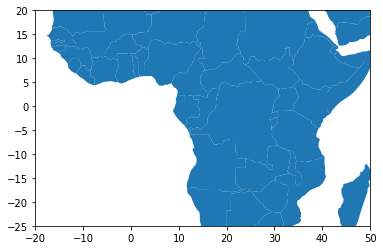

In [54]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1,1)
world_ax = world.plot(figsize=(15,8), ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=2)
fig.savefig(proj_path/"WhereTheBirds_World.jpg")

In [56]:
ax.set_xlim([10,50]); ax.set_ylim([-15,10])
gdf.plot(ax=ax, marker='o', color='red', markersize=1)
fig.savefig(proj_path/"WhereTheBirds_Africa.jpg")

<Figure size 432x288 with 0 Axes>

### HMM

In [85]:
from hmmlearn.hmm import GaussianHMM

In [156]:
df_data_processed['time_delta(s)']

0             NaN
1           303.0
2           300.0
3           300.0
4           300.0
            ...  
7169453     302.0
7169454     298.0
7169455     302.0
7169456     299.0
7169457    3496.0
Name: time_delta(s), Length: 7165703, dtype: float64

In [144]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000).fit(df_data_processed[["Latitude","time_delta"]])

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X)

print("done")

fitting to HMM and decoding ...

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[timedelta64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[timedelta64]'>)